### External Sources and packages
Below cell lists the external dependencies of this notebook. We have utilized current well known third party libraries made for NLP tasks such as: 
1. nltk https://www.nltk.org/
2. gensim https://radimrehurek.com/gensim/index.html
3. spacy https://spacy.io

We have kept the usage of external librairies varied to keep the tasks simplistic and easy to explain and to demonstrate my understanding and usage of the same.
For generating graphs and charts:
4. matplotlib https://matplotlib.org
5. seaborn https://seaborn.pydata.org

In [2]:
!pip install gensim

In [3]:
!pip install "gensim==3.8.1"

  Using cached gensim-3.8.1-cp38-cp38-win_amd64.whl
  Attempting uninstall: gensim
    Found existing installation: gensim 3.4.0
    Uninstalling gensim-3.4.0:
      Successfully uninstalled gensim-3.4.0


In [4]:
!pip install gensim==3.4.0

  Using cached gensim-3.4.0-cp38-cp38-win_amd64.whl
  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.1
    Uninstalling gensim-3.8.1:
      Successfully uninstalled gensim-3.8.1


In [5]:
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from pprint import pprint
from collections import Counter
# from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk import ngrams, FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

import re
from gensim.summarization import summarize
from gensim.summarization import keywords
import spacy
import seaborn as sns
print ("all imports worked nicely")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Computer\AppData\Roaming\nltk_data...
[nltk_data]   Packag

all imports worked nicely


### File parse
Parsing the file as a python dictionary of key, value pairs as ChapterName and ChapterContent. This dictionary can then be used to generate a **Pandas Dataframe**.   

In [6]:
# opening the text file and reading it's contents.
with open('C:/Users/Computer/Documents/book-war-and-peace.txt', 'r') as file:
    txt = file.readlines()

chap_name = ""
content = {}

# parsing the opened file into a dictionary, where "key" = Chapter Name and "value" = Contents of chapter.
for line in txt :
    if "CHAPTER" in line:
#         print line,
        chap_name = line.strip()
        content[chap_name] = chap_name
    else:
        content[chap_name] = content[chap_name] + line


# for key, value in content.iteritems() :
#     print key, value

# Testing the parsing works as expected.
print (len(content))

print (content['CHAPTER I'])

39
CHAPTER I
History is the life of nations and of humanity. To seize and put into
words, to describe directly the life of humanity or even of a single
nation, appears impossible.

The ancient historians all employed one and the same method to describe
and seize the apparently elusive--the life of a people. They described
the activity of individuals who ruled the people, and regarded the
activity of those men as representing the activity of the whole nation.

The question: how did individuals make nations act as they wished and by
what was the will of these individuals themselves guided? the ancients
met by recognizing a divinity which subjected the nations to the will of
a chosen man, and guided the will of that chosen man so as to accomplish
ends that were predestined.

For the ancients these questions were solved by a belief in the direct
participation of the Deity in human affairs.

Modern history, in theory, rejects both these principles.

It would seem that having rejected the be

In [7]:
# calculating the length of each chapter in terms of number of words
df = pd.DataFrame(content.items(), columns=['ChapterName', 'ChapterContent'])

word_count = np.zeros(39)
chapter = 0

for text in df['ChapterContent']:
    count = text.split()
    word_count[chapter] = len(count)
    chapter = chapter + 1

# getting word count for individual chapters
print (word_count)



[1757. 1608.  876. 2338. 1106. 1359. 1289. 1681. 2104. 1998.  606.  842.
 1270. 1954. 1852. 1901. 1901. 1962.  729.  571. 1001.  878. 1584. 1457.
 3523. 2106. 1549. 1063. 3807.  648. 1735. 2366. 2564. 1669. 1540. 1922.
 1155. 1265. 1090.]


### Word Distribution
Chapterwise word distribution. **WordClouds** - show most frequently occuring words, with higher frequency words corelating to high font size. Generating wordCloud showing the most frequently occurring words per Chapter. 

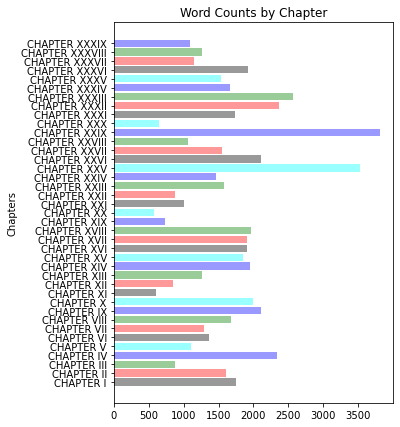

ChapterName                                     ChapterContent  \
0        CHAPTER I  CHAPTER I\nHistory is the life of nations and ...   
1       CHAPTER II  CHAPTER II\nWhat force moves the nations?\n\nB...   
2      CHAPTER III  CHAPTER III\nA locomotive is moving. Someone a...   
3       CHAPTER IV  CHAPTER IV\nHaving abandoned the conception of...   
4        CHAPTER V  CHAPTER V\nThe life of the nations is not cont...   
5       CHAPTER VI  CHAPTER VI\nOnly the expression of the will of...   
6      CHAPTER VII  CHAPTER VII\nWhen an event is taking place peo...   
7     CHAPTER VIII  CHAPTER VIII\nIf history dealt only with exter...   
8       CHAPTER IX  CHAPTER IX\nFor the solution of the question o...   
9        CHAPTER X  CHAPTER X\nThus our conception of free will an...   
10      CHAPTER XI  CHAPTER XI\nHistory examines the manifestation...   
11     CHAPTER XII  CHAPTER XII\nFrom the time the law of Copernic...   
12    CHAPTER XIII  CHAPTER XIII\nWhen Pierre and his wife entered...   
13     CHAPTER XIV  CHAPTER XIV\nSoon after this the children came...   
14      CHAPTER XV  CHAPTER XV\nThe conversation at supper was not...   
15     CHAPTER XVI  CHAPTER XVI\nNatasha and Pierre, left alone, a...   
16    CHAPTER XVII  CHAPTER XVII\nPierre was shown into the large,...   
17   CHAPTER XVIII  CHAPTER XVIII\nIt was a long time before Pierr...   
18     CHAPTER XIX  CHAPTER XIX\nThere was nothing in Pierre's sou...   
19      CHAPTER XX  CHAPTER XX\nAfter Pierre's departure that firs...   
20     CHAPTER XXI  CHAPTER XXI\nThe Russian troops were passing t...   
21    CHAPTER XXII  CHAPTER XXII\nMeanwhile, the city itself was d...   
22   CHAPTER XXIII  CHAPTER XXIII\nFrom an unfinished house on the...   
23    CHAPTER XXIV  CHAPTER XXIV\nOn the evening of the first of S...   
24     CHAPTER XXV  CHAPTER XXV\nToward nine o'clock in the mornin...   
25    CHAPTER XXVI  CHAPTER XXVI\nToward four o'clock in the after...   
26   CHAPTER XXVII  CHAPTER XXVII\nThe absorption of the French by...   
27  CHAPTER XXVIII  CHAPTER XXVIII\nPierre, having decided that un...   
28    CHAPTER XXIX  CHAPTER XXIX\nWhen the French officer went int...   
29     CHAPTER XXX  CHAPTER XXX\nThe glow of the first fire that b...   

    WordCount  
0      1757.0  
1      1608.0  
2       876.0  
3      2338.0  
4      1106.0  
5      1359.0  
6      1289.0  
7      1681.0  
8      2104.0  
9      1998.0  
10      606.0  
11      842.0  
12     1270.0  
13     1954.0  
14     1852.0  
15     1901.0  
16     1901.0  
17     1962.0  
18      729.0  
19      571.0  
20     1001.0  
21      878.0  
22     1584.0  
23     1457.0  
24     3523.0  
25     2106.0  
26     1549.0  
27     1063.0  
28     3807.0  
29      648.0

In [8]:
#import matplotlib as mpl
# # Just making the plots look better
#mpl.style.use('ggplot')

my_colors = 'rgbkymc'

plt.figure(figsize=(5,7))
# plt.rcParams["figure.figsize"] = [16,9]
plt.ylabel('Chapters')
plt.title('Word Counts by Chapter')

# plt.bar(df.WordCount, df.ChapterName)
opacity = 0.4

df['WordCount'] = word_count.tolist()
plt.barh(df.ChapterName, df.WordCount, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
# plt.barh(df.ChapterName, df.WordCount, color= my_colors)

plt.show()


# df = df.drop('wordCount', 1)


df.head(30)

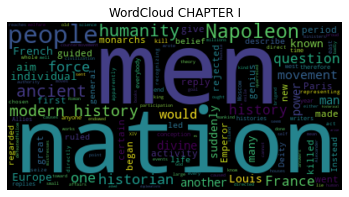

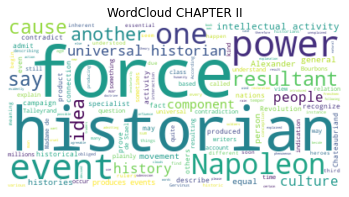

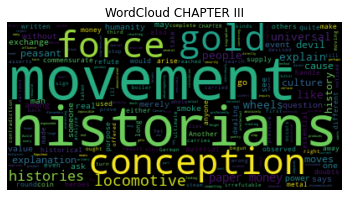

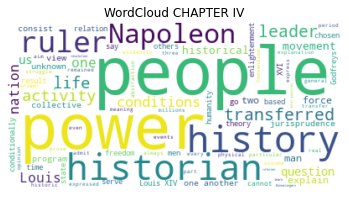

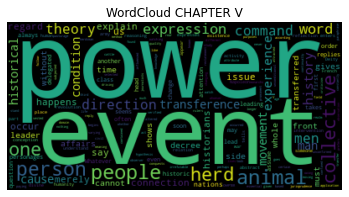

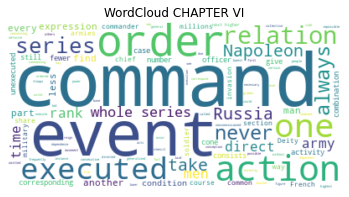

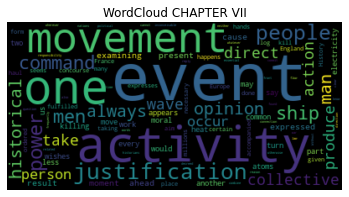

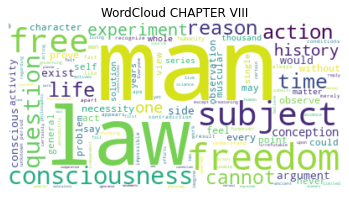

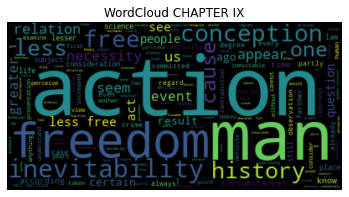

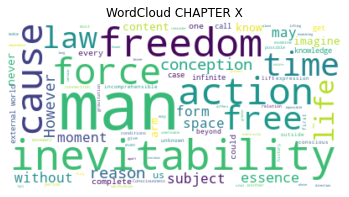

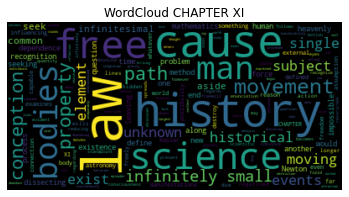

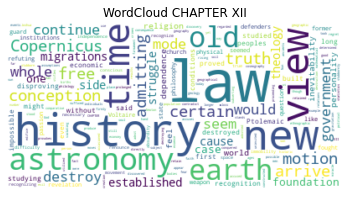

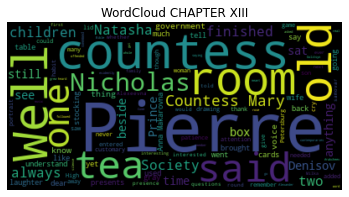

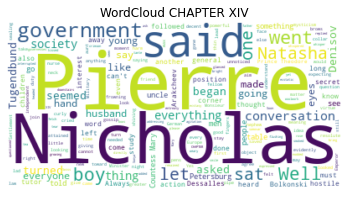

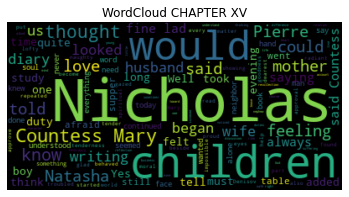

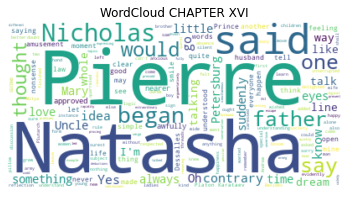

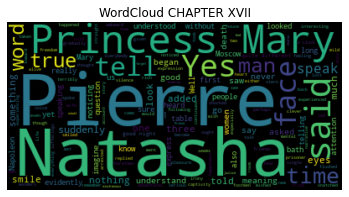

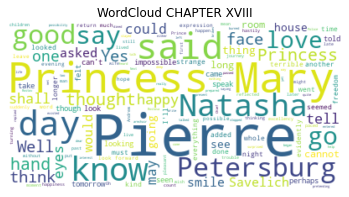

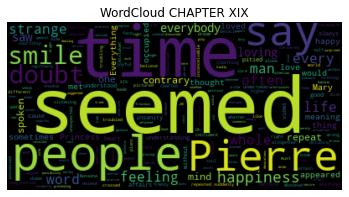

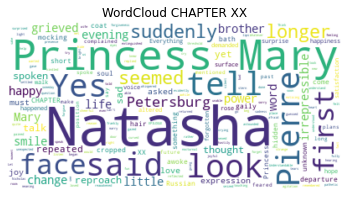

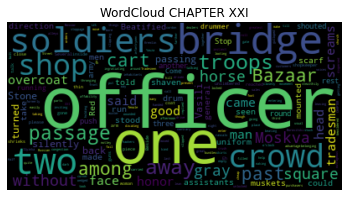

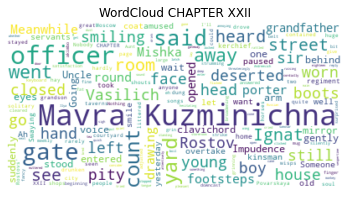

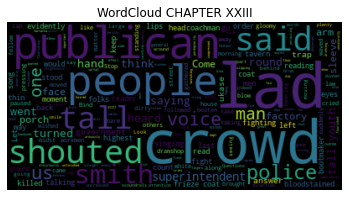

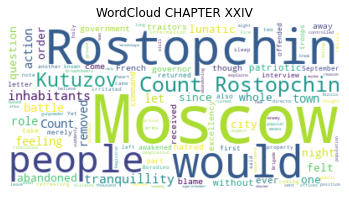

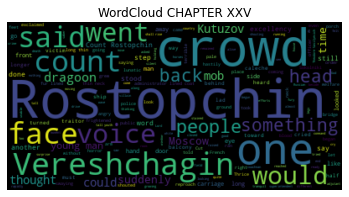

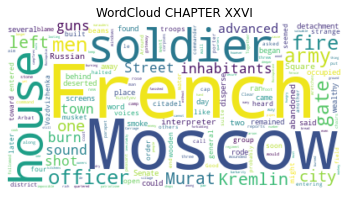

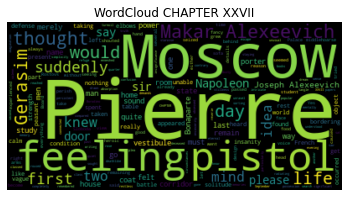

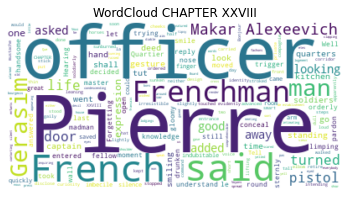

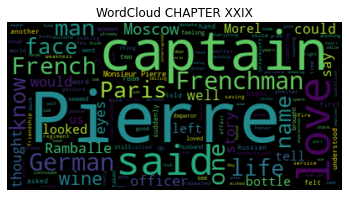

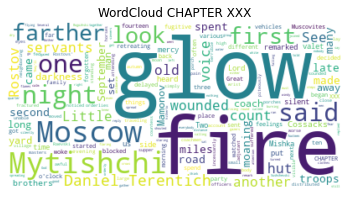

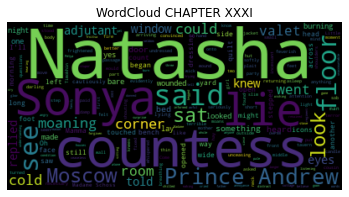

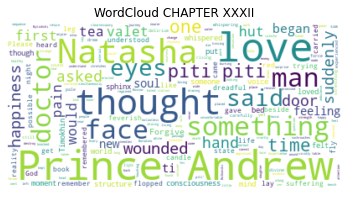

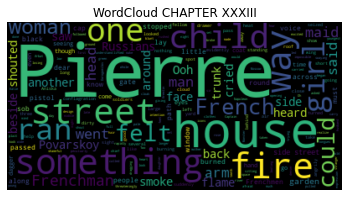

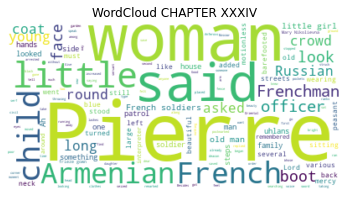

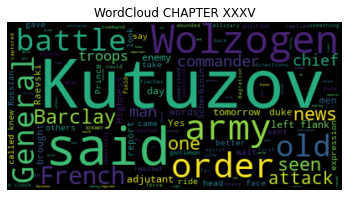

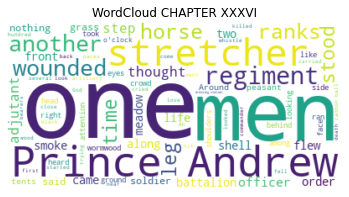

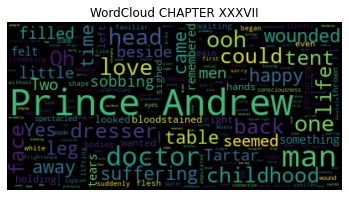

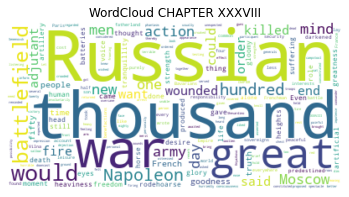

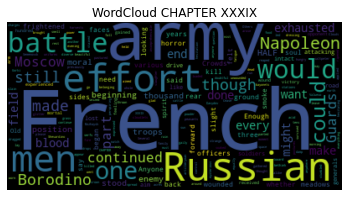

In [9]:
# WordClouds - show most frequently occuring words, with higher frequency words corelating to high font size
# generating wordCloud showing the most frequently occurring words per Chapter 
color_flag = True
chapter_count = 0
for text in df['ChapterContent']:
    if color_flag:
        wordcloud = WordCloud(stopwords=stop_words).generate(text)
    else:
        wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
    # Display the generated image:
    plt.title("WordCloud " + df['ChapterName'][chapter_count])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    color_flag = not color_flag
    chapter_count = chapter_count + 1

### Phrase Distribution
Performing Phrase distribution(s) throughout the whole book and then for individual Chapter(s).

No handles with labels found to put in legend.


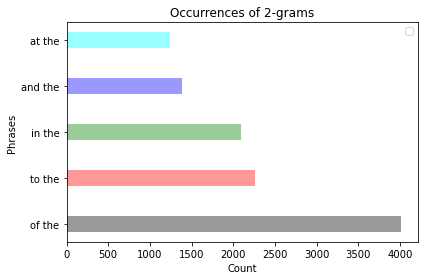

No handles with labels found to put in legend.


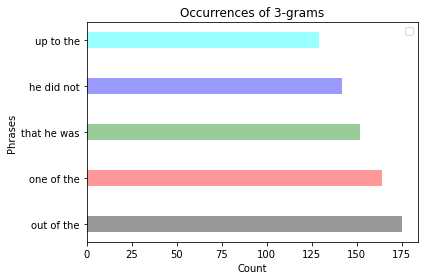

No handles with labels found to put in legend.


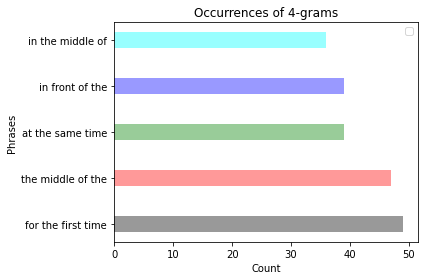

No handles with labels found to put in legend.


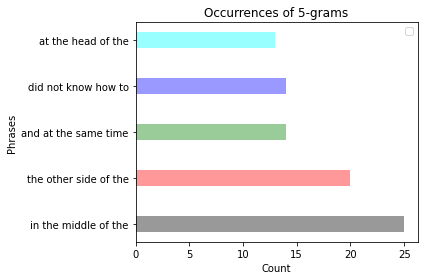

In [10]:
#data = df['ChapterContent'][0]

# Phrase distribution(s) throughout the whole book
data = ''.join(txt)
all_counts = dict()
# counting till n-grams, n ranging from 2..5 
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(data.split(), size))


for count in 2, 3, 4, 5:
    data = all_counts[count].most_common(5)
    phrase_count = [x[1] for x in data]
    phrase_content = [' '.join(x[0]) for x in data]

    fig, ax = plt.subplots()

    bar_width = 0.35
    opacity = 0.4

    plt.barh(phrase_content, phrase_count, bar_width, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel('Count')
    plt.ylabel('Phrases')
    plt.title('Occurrences of %s-grams' % count)
    plt.legend()

    plt.tight_layout()
    plt.show()

No handles with labels found to put in legend.


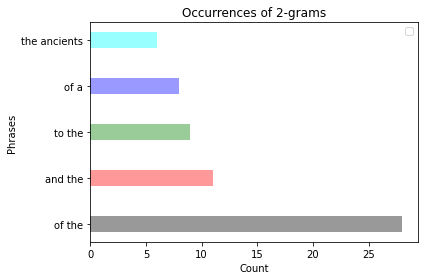

No handles with labels found to put in legend.


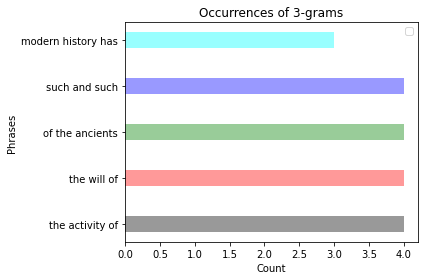

No handles with labels found to put in legend.


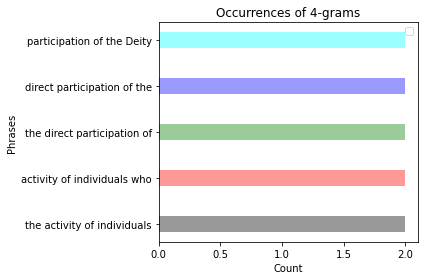

No handles with labels found to put in legend.


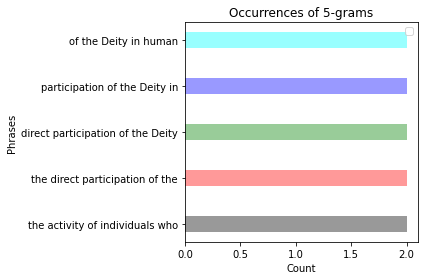

In [11]:
# Phrase distribution(s) throughout individual Chapters, eg. Chapter XI 
data = df['ChapterContent'][0]
all_counts = dict()
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(data.split(), size))


for count in 2, 3, 4, 5:
    data = all_counts[count].most_common(5)
    phrase_count = [x[1] for x in data]
    phrase_content = [' '.join(x[0]) for x in data]

    bar_width = 0.35
    opacity = 0.4

    plt.barh(phrase_content, phrase_count, bar_width, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel('Count')
    plt.ylabel('Phrases')
    plt.title('Occurrences of %s-grams' % count)
    plt.legend()

    plt.tight_layout()
    plt.show()


## NOTE:
The process of **Stop Word removal** happens next, as "phrase" distribution should be done with stop words
taken into account.

In [12]:
def tokenize_and_stopWordsRemoval(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation) and words whose length is less than 2 characters - removes <br/a> formating from data 
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2 and token not in stop_words :
            filtered_tokens.append(token)
    return filtered_tokens

#tokenize
%time tokenized_text = [tokenize_and_stopWordsRemoval(text) for text in txt]

Wall time: 16.9 s


In [13]:
print (len(tokenized_text))
print (tokenized_text[11])
print (txt[11])

63845
['Scherer', 'maid', 'honor', 'favorite', 'Empress', 'Marya', 'Fedorovna', 'With']
Scherer, maid of honor and favorite of the Empress Marya Fedorovna. With



## Name and Place Identification
This can be achieved by **Named Entity Recognition (NER)**. Here we first utilize **Spacy** for this purpose but after seeing quiet a few exceptions in the results, I have also shown the same task using NLTK's NER. 
Top 10 results for both the categories(Name of people and places) are shown below. 

In [14]:
!pip install spacy

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2002143

doc_str = ""
for item in tokenized_text:
    doc_str = doc_str + " " + " ".join(item)
    
doc = nlp(doc_str.encode().decode())
print (type(doc))

print([(X.text, X.label_) for X in doc.ents])

list_person = []
list_place = []

for X in doc.ents:
    if (X.label_ == u'PERSON'):
        list_person.append((X.text, X.label_))
    elif (X.label_ == u'GPE')| (X.label_ == u'LOC') :
        list_place.append((X.text, X.label_))

# Set operation on lists to remove the duplicate entries
list_person = list(set(list_person))
list_place = list(set(list_place))

# printing first 10 items in each category
print (list_person[:10])
print (list_place[:10])

<class 'spacy.tokens.doc.Doc'>
[('CHAPTER  Well Prince Genoa Lucca', 'LAW'), ('Antichrist', 'PERSON'), ('Antichrist', 'PERSON'), ('July', 'DATE'), ('Anna Pavlovna Scherer', 'PERSON'), ('Empress Marya Fedorovna', 'ORG'), ('Prince Vasili Kuragin', 'PERSON'), ('first', 'ORDINAL'), ('Anna Pavlovna', 'PERSON'), ('days', 'DATE'), ('St. Petersburg', 'GPE'), ('French', 'NORP'), ('evening', 'TIME'), ('tonight', 'TIME'), ('Annette Scherer', 'ORG'), ('French', 'NORP'), ('Anna Pavlovna', 'PERSON'), ('First', 'ORDINAL'), ('Anna Pavlovna', 'PERSON'), ('English', 'LANGUAGE'), ('Today', 'DATE'), ('Wednesday', 'DATE'), ('today', 'DATE'), ('Novosiltsev', 'PERSON'), ('Buonaparte', 'GPE'), ('Prince Vasili', 'PERSON'), ('Anna Pavlovna Scherer', 'PERSON'), ('forty years', 'DATE'), ('Anna Pavlovna', 'PERSON'), ('Austria Perhaps', 'PERSON'), ('Austria', 'GPE'), ('Russia', 'GPE'), ('Europe', 'LOC'), ('one', 'CARDINAL'), ('England', 'GPE'), ('Novosiltsev', 'PERSON'), ('English', 'NORP'), ('Prussia', 'GPE'), ('B

In [16]:
nltk_personList = []
nltk_placeList = []

import nltk
for sent in nltk.sent_tokenize(doc_str):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            if (chunk.label() == 'PERSON'):
                nltk_personList.append((chunk.label(), ' '.join(c[0] for c in chunk)))
            elif (chunk.label() == 'GPE'):
                nltk_placeList.append((chunk.label(), ' '.join(c[0] for c in chunk)))

# Set operation on lists to remove the duplicate entries
nltk_personList = list(set(nltk_personList))
nltk_placeList = list(set(nltk_placeList))

# printing first 10 items in each category
print (nltk_personList[:10])
print (nltk_placeList[:10])

[('PERSON', 'Look Natasha'), ('PERSON', 'Tilsit Yes'), ('PERSON', 'Salamanca'), ('PERSON', 'Semenova'), ('PERSON', 'Rostov Well'), ('PERSON', 'Shevardino'), ('PERSON', 'Pierre Better'), ('PERSON', 'Julie'), ('PERSON', 'Prince Andrew Nothing'), ('PERSON', 'Astraea Lodge Manna Seekers')]
[('GPE', 'Fain'), ('GPE', 'Corsican'), ('GPE', 'London'), ('GPE', 'Moravian'), ('GPE', 'Europe'), ('GPE', 'Great'), ('GPE', 'Pale'), ('GPE', 'Bright'), ('GPE', 'Kaysarov'), ('GPE', 'Closer')]


## Sentiment Ananlysis
Here we attempt to get the sentiment of each line in the whole document based on **NLTK's Vader Analyzer**. 
In order to keep the task simplistic, we are refraining from training a Neural network architecture (LSTM or CNN)
for this, as it will need the training to be done on some other labelled data set and then utilize transfer learning to work on this  piece of text.

Instead we use NLTK, and label sentences polarity based on the polarity score of it's individual words.
The sentiment scoring consists of 4 tags : Neu, Neg, Pos and compound. The first three represent the sentiment score percentage of each category in our sentence, and the compound single number that scores the sentiment. `compound` ranges from -1 (Extremely Negative) to 1 (Extremely Positive).

we have considered sentences with a compound value greater than 0.2 as positive and less than -0.2 as negative. The **label** column in data frame refers to the sentiment of the sentence, 0 being neutral, +1 positive and -1 negative respectively. 

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

sentiments = []
for text in txt[:10]:
    for sent in nltk.sent_tokenize(text):
        print (sent)
        print(vader_analyzer.polarity_scores(sent))
        sent_dic = vader_analyzer.polarity_scores(sent)
        sent_dic["sentence"] = sent
        sentiments.append(sent_dic)

df_sentiments = pd.DataFrame.from_records(sentiments)

df_sentiments['label'] = 0
df_sentiments.loc[df_sentiments['compound'] > 0.2, 'label'] = 1
df_sentiments.loc[df_sentiments['compound'] < -0.2, 'label'] = -1
df_sentiments.head()

df_sentiments.head(10)

CHAPTER I
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
"Well, Prince, so Genoa and Lucca are now just family estates of the
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Buonapartes.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
But I warn you, if you don't tell me that this means war,
{'neg': 0.346, 'neu': 0.654, 'pos': 0.0, 'compound': -0.6486}
if you still try to defend the infamies and horrors perpetrated by that
{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'compound': -0.5719}
Antichrist--I really believe he is Antichrist--I will have nothing more
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
to do with you and you are no longer my friend, no longer my 'faithful
{'neg': 0.205, 'neu': 0.512, 'pos': 0.284, 'compound': 0.4019}
slave,' as you call yourself!
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
But how do you do?
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I see I have frightened
{'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'compound'

neg    neu    pos  compound  \
0  0.000  1.000  0.000    0.0000   
1  0.000  1.000  0.000    0.0000   
2  0.000  1.000  0.000    0.0000   
3  0.346  0.654  0.000   -0.6486   
4  0.236  0.764  0.000   -0.5719   
5  0.000  1.000  0.000    0.0000   
6  0.205  0.512  0.284    0.4019   
7  0.000  1.000  0.000    0.0000   
8  0.000  1.000  0.000    0.0000   
9  0.592  0.408  0.000   -0.4404   

                                            sentence  label  
0                                          CHAPTER I      0  
1  "Well, Prince, so Genoa and Lucca are now just...      0  
2                                       Buonapartes.      0  
3  But I warn you, if you don't tell me that this...     -1  
4  if you still try to defend the infamies and ho...     -1  
5  Antichrist--I really believe he is Antichrist-...      0  
6  to do with you and you are no longer my friend...      1  
7                      slave,' as you call yourself!      0  
8                                 But how do you do?      0  
9                            I see I have frightened     -1

Positive sentences:

["to do with you and you are no longer my friend, no longer my 'faithful"]

Negative sentences:

["But I warn you, if you don't tell me that this means war,", 'if you still try to defend the infamies and horrors perpetrated by that', 'I see I have frightened']


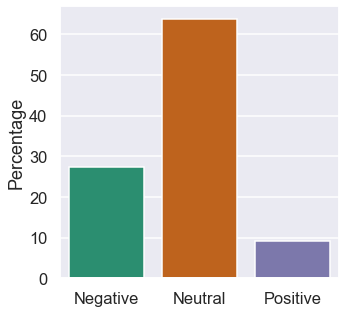

In [18]:
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

# printing first 5 positive sentences from the dataframe
print("Positive sentences:\n")
print (list(df_sentiments[df_sentiments['label'] == 1].sentence)[:5])

# printing first 5 negative sentences from the dataframe
print("\nNegative sentences:\n")
print (list(df_sentiments[df_sentiments['label'] == -1].sentence)[:5])

fig, ax = plt.subplots(figsize=(5, 5))

counts = df_sentiments.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

## Text Summarizer
Here we are creating summary of each Chapter, using **Gensim's summarizer**. This summarizer is based on **TextRank algorithm** which is losely similar to PageRank algorithm used by Google. Text is converted to graph with  vertices and edges and the more a sentence is linked by other sentence the higher it's score grows. Summary is generated by top high scoring sentences. 

In [19]:


print (type(df.ChapterContent[0]))

chapter_count = 0
for text in df['ChapterContent']:
    # Display the generated Chapterwise summary:
    print ('Summary:%s' % df['ChapterName'][chapter_count])
    summary = summarize(df.ChapterContent[chapter_count]) 
    print (summarize(df.ChapterContent[chapter_count]))
    print
    print ("Length of original text %d, length of summary %d characters." % (len(df['ChapterContent'][chapter_count]), len(summary)))
    print
    chapter_count = chapter_count + 1

<class 'str'>
Summary:CHAPTER I
History is the life of nations and of humanity.
the activity of individuals who ruled the people, and regarded the
activity of those men as representing the activity of the whole nation.
The question: how did individuals make nations act as they wished and by
met by recognizing a divinity which subjected the nations to the will of
Modern history, in theory, rejects both these principles.
are led, modern history should study not the manifestations of power but
Instead of men endowed with divine authority and directly guided by the
humanity, modern history has postulated its own aims--the welfare of the
Modern history has rejected the beliefs of the ancients without
individual men, and (2) the existence of a known aim to which these
nations and humanity at large are tending.
by a movement of peoples from west to east.
as the first movement had done, the nations of middle Europe.
science of history, whose aim is to enable nations and humanity to know
If his

# Naive Bayes Classifier for Multinomial Models

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X = df_sentiments.sentence
y = df_sentiments.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred= nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))


accuracy 0.75
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\Computer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Linear Support Vector Machine

In [40]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


accuracy 0.5
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)



y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.5
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



# RandomForest Classification

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc= Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

accuracy 0.75
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.75      1.00      0.86         3

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4



C:\Users\Computer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Computer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

